# Assignment - 5

### CS22B1093 Rohan G

----------------

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

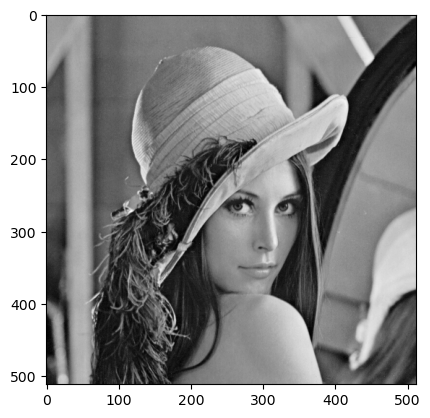

In [10]:
img = cv2.imread("Lena.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

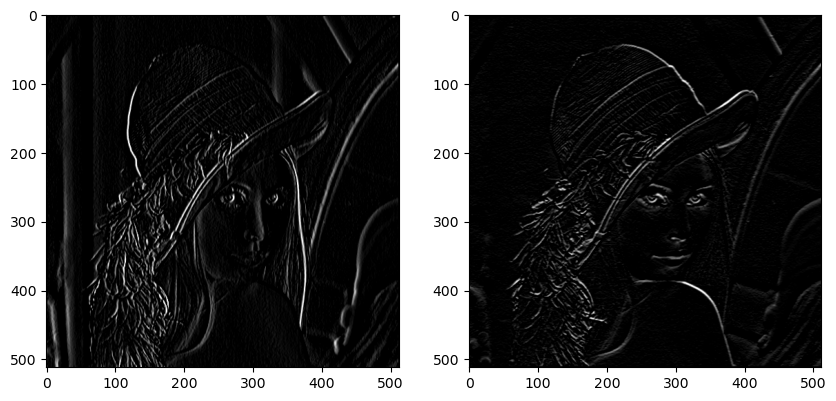

In [11]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img_prewitt_x = cv2.filter2D(img, -1, prewitt_x)
img_prewitt_y = cv2.filter2D(img, -1, prewitt_y)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_prewitt_x, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img_prewitt_y, cmap="gray")
plt.show()

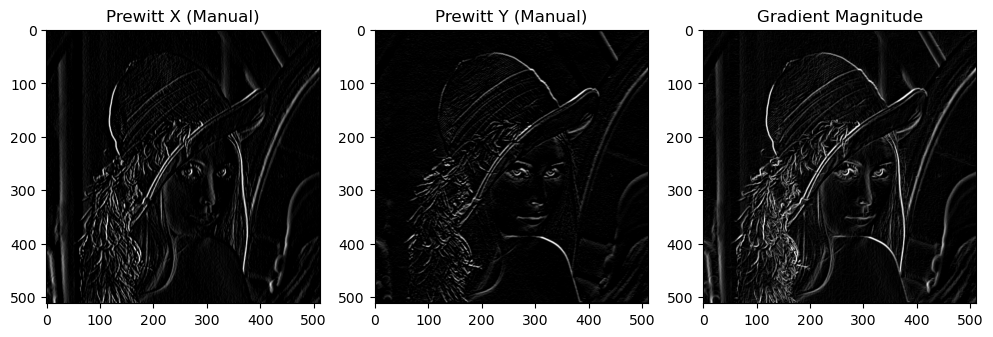

In [12]:
def convolve2D(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    result = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded_img[i:i+kh, j:j+kw]  
            result[i, j] = np.sum(region * kernel)  

    result = np.clip(result, 0, 255)
    return np.uint8(result)

grad_x = convolve2D(img, prewitt_x)
grad_y = convolve2D(img, prewitt_y)

edge_magnitude = np.sqrt(grad_x.astype(np.float32)**2 + grad_y.astype(np.float32)**2)
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Prewitt X (Manual)")
plt.imshow(grad_x, cmap="gray")

plt.subplot(1, 3, 2)
plt.title("Prewitt Y (Manual)")
plt.imshow(grad_y, cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Gradient Magnitude")
plt.imshow(edge_magnitude, cmap="gray")

plt.show()

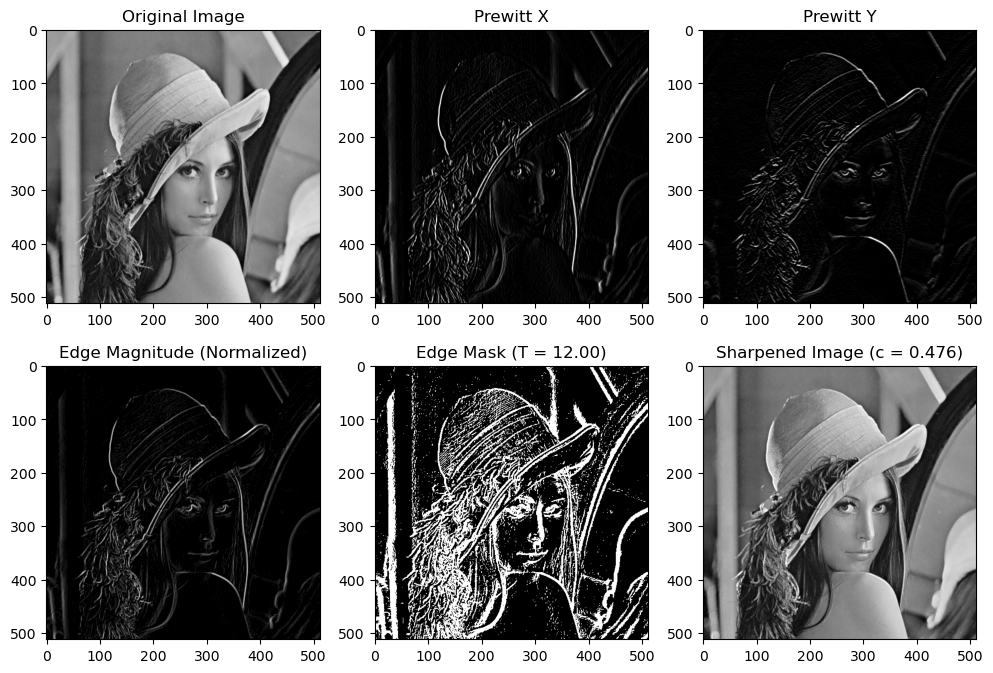

True

In [17]:
grad_x = cv2.filter2D(img, -1, prewitt_x)
grad_y = cv2.filter2D(img, -1, prewitt_y)

edge_magnitude = np.sqrt(grad_x.astype(np.float32)**2 + grad_y.astype(np.float32)**2)

edge_magnitude = (edge_magnitude / edge_magnitude.max()) * 255
edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)

T = np.percentile(edge_magnitude, 75)  
edge_magnitude[edge_magnitude < T] = 0

c = 0.3 + (np.std(img) / 255)  

sharpened_img = cv2.addWeighted(img.astype(np.float32), 1, edge_magnitude.astype(np.float32), c, 0)

sharpened_img = np.clip(sharpened_img, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(2, 3, 2)
plt.title("Prewitt X")
plt.imshow(grad_x, cmap="gray")

plt.subplot(2, 3, 3)
plt.title("Prewitt Y")
plt.imshow(grad_y, cmap="gray")

plt.subplot(2, 3, 4)
plt.title("Edge Magnitude (Normalized)")
plt.imshow(edge_magnitude, cmap="gray")

plt.subplot(2, 3, 5)
plt.title(f"Edge Mask (T = {T:.2f})")
plt.imshow(edge_magnitude > 0, cmap="gray") 

plt.subplot(2, 3, 6)
plt.title(f"Sharpened Image (c = {c:.3f})")
plt.imshow(sharpened_img, cmap="gray")

plt.show()

cv2.imwrite("Sharpened_Lena_Image.jpg", sharpened_img)

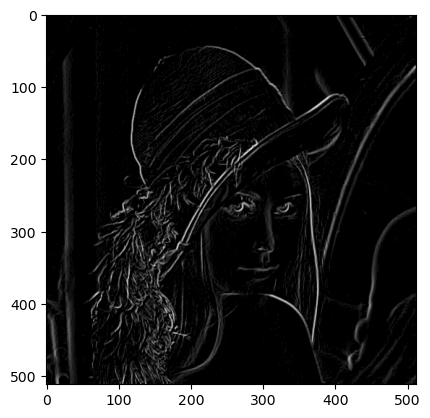

In [14]:
diff = cv2.absdiff(img, sharpened_img)
plt.imshow(diff, cmap="gray")

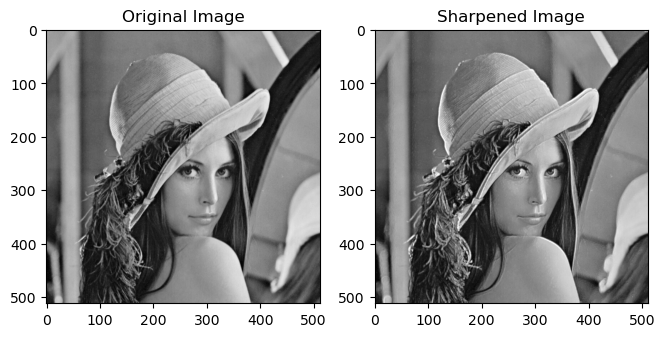

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(2, 3, 2)
plt.title(f"Sharpened Image")
plt.imshow(sharpened_img, cmap="gray")

plt.show()



-----------